# É uma moto ou não?

Aluno: Luís Guilherme Gaboardi Lins

Matrícula: 180022962

**Os passos que tomaremos:**

1. Usar o DuckDuckGo para pesquisar imagens de "moto"
1. Usar o DuckDuckGo para pesquisar imagens de "bicicleta"
1. Treinar o modelo de rede neural pré-treinado para reconhecer os nossos dois grupos
1. Executa esse modelo para prever a imagem de moto e bicicleta e verificar corretude.

## Passo 0: Baixar dependências

In [ ]:
!pip install -Uqq duckduckgo_search fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.4/75.4 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 47.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.0 MB/s eta 0:00:00


## Passo 1: Fazer download de imagens de motos e bicicletas

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


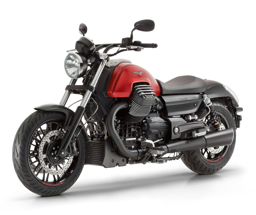

In [ ]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=200):
  return L(ddg_images(term, max_results=max_images)).itemgot('image')

categories = 'moto', 'bicicleta'

for category in categories:
  download_url(search_images(category, max_images=1)[0], category + '.jpg', show_progress=False)

Image.open(categories[0] + '.jpg').to_thumb(256,256)

In [ ]:
path = Path('moto_ou_nao')

for o in categories:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}', 250))
    resize_images(path/o, max_size=400, dest=path/o)

/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/usr/local/lib/python3.10/dist-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


## Passo 2: Treinar o modelo

Remove fotos que falharam no download:

In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

5

Cria os DataBlock e DataLoader

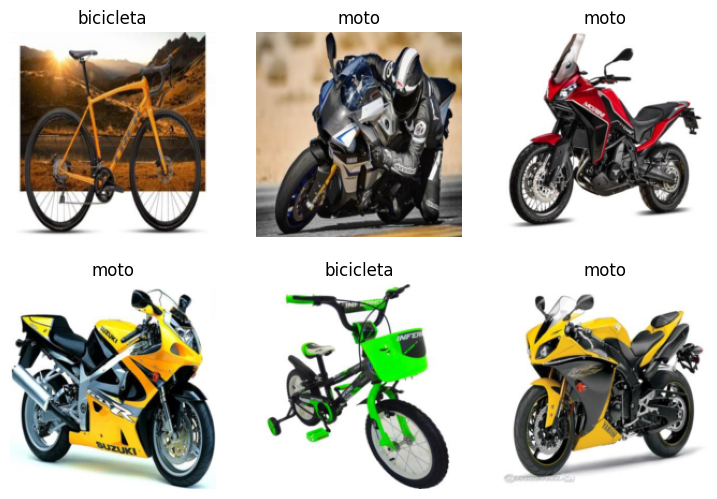

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=19),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

Executa o treinamento:

In [ ]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.965119,0.217265,0.117647,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.167331,0.022198,0.000000,00:02
1,0.102223,0.000958,0.000000,00:01
2,0.066566,0.000261,0.000000,00:01


## Passo 3: Usando o modelo (inferência)

Imagem que o modelo vai avaliar:

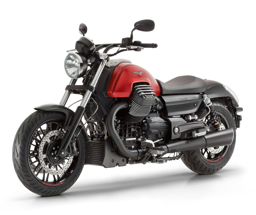

In [ ]:
imagem_teste = categories[0]

Image.open(imagem_teste + '.jpg').to_thumb(256,256)

In [ ]:
is_moto,_,probs = learn.predict(PILImage.create(imagem_teste + '.jpg'))
print(f"Isso é uma: {is_moto}.")
print(f"Probabilidade de ser uma moto: {(100 * (1 - probs[0])):.2f}%")

Isso é uma: moto.
Probabilidade de ser uma moto: 100.00%
